In [ ]:
!pip install -q pydot
!apt install -y graphviz
!pip install graphviz

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Task1. training decision tree model with Iris dataset

decision tree criterion 
* entropy 
* gini 

https://quantdare.com/decision-trees-gini-vs-entropy/

In [ ]:
def main():
  #load the dataset
  dataset = datasets.load_iris()

  features = dataset.data
  targets = dataset.target

  #take petal width and length features
  petal_features = features[:,2:]

  #generate decision tree model
  model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
  
  #trainig model
  model.fit(petal_features, targets)

  #export result as DOT format
  with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz(model, out_file=f)

main()

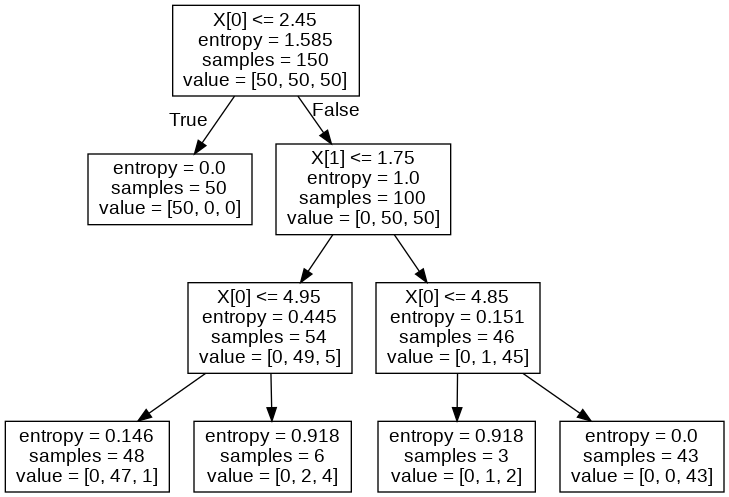

In [ ]:
!dot -Tpng iris-dtree.dot > iris-dtree.png
from IPython.display import Image
Image('iris-dtree.png')

## Task2. classify breast cancer data with decision tree model

In [ ]:
from sklearn.model_selection import train_test_split

def main():
  #load the data
  cancer = datasets.load_breast_cancer()

  #split training and test dataset 
  x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=42)

  #generate decision tree model
  model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

  #training model
  model.fit(x_train,y_train)
  print("training score: {:.3f}".format(model.score(x_train, y_train)))
  print("test score: {:.3f}".format(model.score(x_test, y_test)))

  #export result as DOT format
  with open('cancer-dtree.dot', mode='w') as f:
    tree.export_graphviz(model, out_file=f, feature_names=cancer.feature_names, class_names=["Positive","Negative"])

main()


training score: 0.967
test score: 0.947


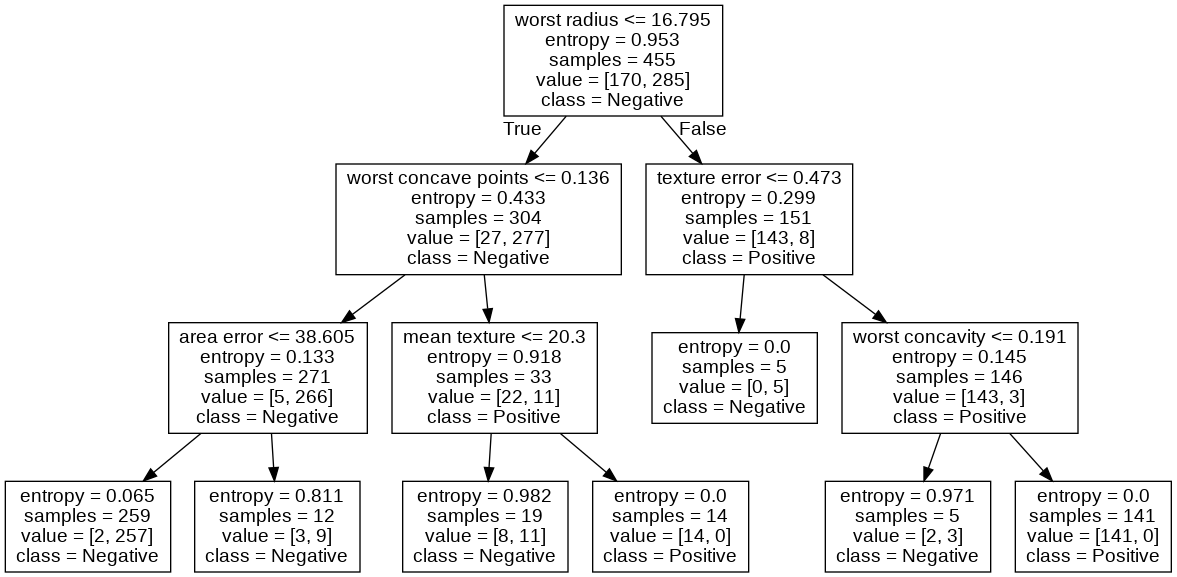

In [ ]:
!dot -Tpng cancer-dtree.dot > cancer-dtree.png
from IPython.display import Image
Image('cancer-dtree.png')